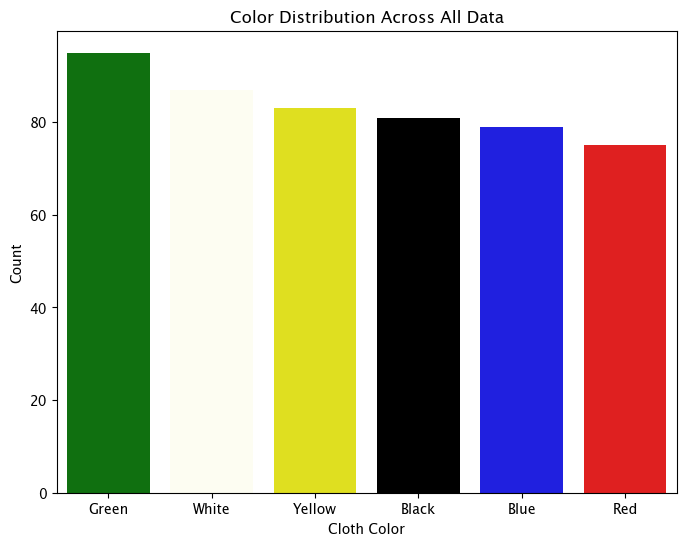

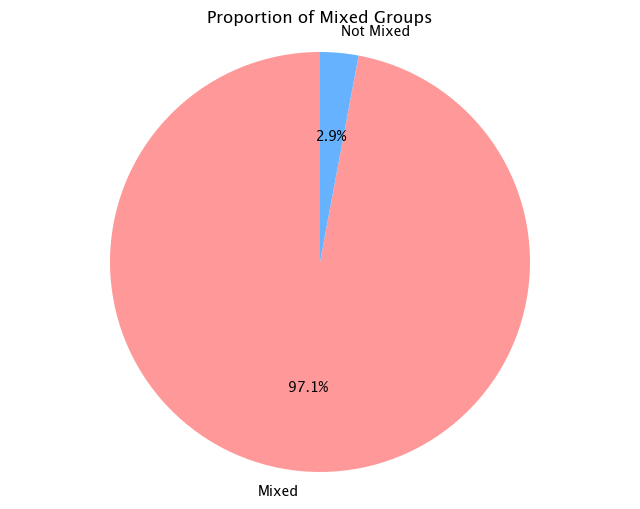

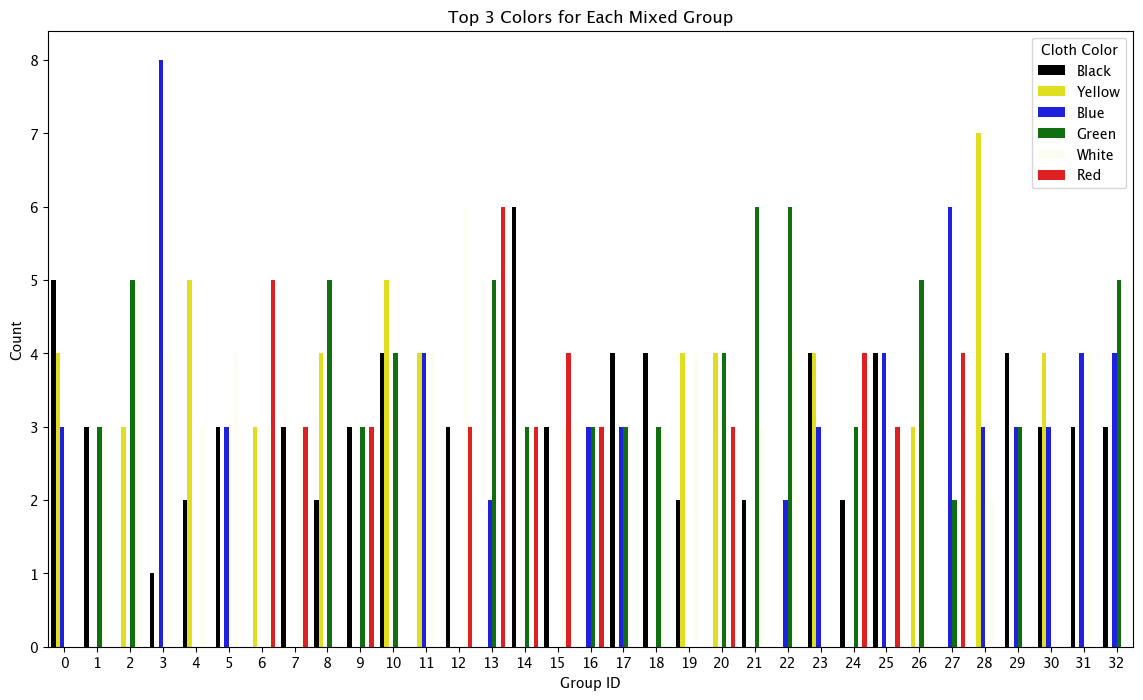

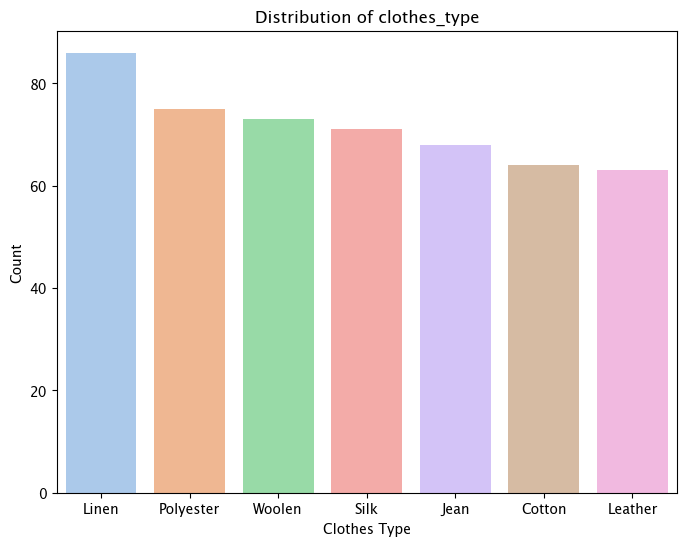

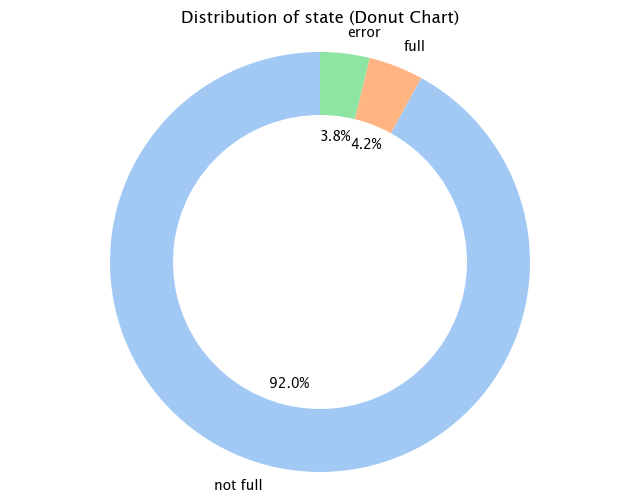

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel("clothes_data.xlsx")

# Color and Type mappings
color_mapping = {
    1: "Red",
    2: "Blue",
    3: "Green",
    4: "Yellow",
    5: "White",  # Using Ivory instead of White
    6: "Black"
}

type_mapping = {
    1: "Cotton",
    2: "Jean",
    3: "Silk",
    4: "Polyester",
    5: "Woolen",
    6: "Linen",
    7: "Leather"
}

# Apply the mappings to data
data['cloth_color'] = data['cloth_color_id'].map(color_mapping)
data['clothes_type'] = data['clothes_type_id'].map(type_mapping)

# Assuming every 15 clothes are grouped together, we can use integer division by 15 to create a Group ID
data['Group ID'] = data.index // 15

# Adjusted color palette
adjusted_palette = {
    "Red": "red",
    "Blue": "blue",
    "Green": "green",
    "Yellow": "yellow",
    "White": "#FFFFF0",  # Color code for Ivory
    "Black": "black"
}

# 1. Color Distribution Plot
color_distribution = data['cloth_color'].value_counts()
color_palette = [adjusted_palette[color] for color in color_distribution.index]
plt.figure(figsize=(8, 6))
sns.barplot(x=color_distribution.index, y=color_distribution.values, palette=color_palette)
plt.title("Color Distribution Across All Data")
plt.ylabel("Count")
plt.xlabel("Cloth Color")
plt.show()

# 2. Proportion of Mixed Groups
group_color_count = data.groupby('Group ID')['cloth_color'].nunique()
mixed_groups = group_color_count[group_color_count > 3]
labels = ['Mixed', 'Not Mixed']
sizes = [len(mixed_groups), data['Group ID'].nunique() - len(mixed_groups)]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b2ff'])
plt.title("Proportion of Mixed Groups")
plt.axis('equal')
plt.show()


# 3. Top 3 Colors for Each Mixed Group
top_colors_per_group = data[data['Group ID'].isin(mixed_groups.index)].groupby(['Group ID', 'cloth_color']).size().reset_index(name='counts')
top_colors_per_group = top_colors_per_group.sort_values(['Group ID', 'counts'], ascending=[True, False])
top_3_colors_per_group = top_colors_per_group.groupby('Group ID').head(3)
plt.figure(figsize=(14, 8))
sns.barplot(data=top_3_colors_per_group, x='Group ID', y='counts', hue='cloth_color', palette=adjusted_palette)
plt.title("Top 3 Colors for Each Mixed Group")
plt.ylabel("Count")
plt.legend(title='Cloth Color')
plt.show()

# 4. clothes_type Distribution Plot
cloth_type_distribution = data['clothes_type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=cloth_type_distribution.index, y=cloth_type_distribution.values, palette="pastel")
plt.title("Distribution of clothes_type")
plt.ylabel("Count")
plt.xlabel("Clothes Type")
plt.show()

# 5. State Distribution Donut Chart
state_distribution = data['state'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(state_distribution.values, labels=state_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel", len(state_distribution)), wedgeprops=dict(width=0.3))
plt.title("Distribution of state (Donut Chart)")
plt.axis('equal')
plt.show()